In [1]:
import nltk
import re
import pandas as pd

#nltk.download()

In [2]:
df=pd.read_csv(r'/home/raghuannadurai/Downloads/Cf_analysis_&_NTA_Data.csv')

In [3]:
df.head()

,content,intent,entity
0,FGGYQ01-NKC-AIR-OPS-SM server is down at 2021-...,server_down,B-SERVER O O O O B-DATE B-TIME
1,FGGYQ01-NKC-POL-SM server is down at 2021-05-0...,server_down,B-SERVER O O O O B-DATE B-TIME
2,FGGBQ10-AMMUNITION-AP1 server is down at 2021-...,server_down,B-SERVER O O O O B-DATE B-TIME
3,FLRBA02-ASA1 interface IF-FLRBA02-ASA1/4 [insi...,interface_unstable,O O O O O O O O B-DATE B-TIME
4,Cannot access account or claim registered device,cannot_access_account,O O O O O O O


In [4]:
df['content']=df['content'].str.strip()

In [5]:
df.head(10)

,content,intent,entity
0,FGGYQ01-NKC-AIR-OPS-SM server is down at 2021-...,server_down,B-SERVER O O O O B-DATE B-TIME
1,FGGYQ01-NKC-POL-SM server is down at 2021-05-0...,server_down,B-SERVER O O O O B-DATE B-TIME
2,FGGBQ10-AMMUNITION-AP1 server is down at 2021-...,server_down,B-SERVER O O O O B-DATE B-TIME
3,FLRBA02-ASA1 interface IF-FLRBA02-ASA1/4 [insi...,interface_unstable,O O O O O O O O B-DATE B-TIME
4,Cannot access account or claim registered device,cannot_access_account,O O O O O O O
5,Fwd: case 43942706,case,O O B-CASE
6,James manaloto #43949959,no_intent,O O B-CASE
7,Re: INCIDENT REPORT l FEDEX Delayed Shipment,delayed_shipment,B-ORG O O O O O O
8,FLRXF02-RBD1 router is down at 2021-05-20 21:3...,router_down,O O O O O B-DATE B-TIME
9,FLRTG02-ADMIN-SW10 switch is down at 2021-05-0...,switch_down,O O O O O B-DATE B-TIME


In [6]:
df.to_csv('/home/raghuannadurai/Desktop/NLP Task/clusting.csv')

In [7]:
data=pd.read_csv('/home/raghuannadurai/Desktop/NLP Task/clusting.csv')

In [8]:
data=data['content']

In [9]:
data=pd.DataFrame(data)

In [10]:
data['content']=data['content'].str.replace("#","")

In [11]:
data['content']=data['content'].str.replace("-","")


In [12]:
symbol="!”#$%&\’()*+,-./:;<=>?@[\\]^_`{|}~’"
for char in symbol:
    data['content']=data['content'].str.replace(char,'')

/home/raghuannadurai/anaconda3/envs/nlpwork/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


### Text_Preprocessing Bag of words

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [14]:
corpus=[]
for i in range(0 ,len(data)):
    review=re.sub(r'[^A-Za-z[0-9]+]',' ',str(data['content'][i]))
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(words) for words in review 
            if words not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [15]:
corpus

['fggyq01nkcairopssm server 20210507 181559',
 'fggyq01nkcpolsm server 20210504 092016',
 'fggbq10ammunitionap1 server 20210505 101551',
 'flrba02asa1 interface ifflrba02asa14 inside 10842410 unstable 20210506 071652',
 'cannot access account claim registered device',
 'fwd case 43942706',
 'james manaloto 43949959',
 'incident report l fedex delayed shipment',
 'flrxf02rbd1 router 20210520 213809',
 'flrtg02adminsw10 switch 20210505 004011',
 '3615285 rma replacement inquiry',
 'fggbq10bafsouthfuelfarmsm server 20210508 035510',
 'fggbq10reefershopsm server 20210513 101107',
 'netgear service contract gearhead home cancellation request',
 'user fx02 unable receive scan file printer shared mailbox',
 'fggyq01nkcairopssm server 20210502 040055',
 'fggbq10lc4174125sm1 server 20210509 063916',
 '43938443',
 'returnrefund order 0162215',
 'syslexf52000int1 interface ifsyslexf52000int1448 13 20210514 180012',
 'flrsc02sw1 switch 20210523 051344',
 'fggbq10campvancemcbsm server 20210521 0748

In [16]:
cleaned_data=pd.DataFrame(corpus)

In [17]:
type(cleaned_data)

pandas.core.frame.DataFrame

In [18]:
cleaned_data.columns=["context"]
cleaned_data

,context
0,fggyq01nkcairopssm server 20210507 181559
1,fggyq01nkcpolsm server 20210504 092016
2,fggbq10ammunitionap1 server 20210505 101551
3,flrba02asa1 interface ifflrba02asa14 inside 10...
4,cannot access account claim registered device
...,...
2575,fggbq10fluorvillagetowerap4 server 20210506 09...
2576,register refurbished product
2577,fall 43937380
2578,flrho01tpcasa2 interface ifflrho01tpcasa24 out...


### Approch -1 using count vectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=200000,ngram_range=(1,3))
X_count=cv.fit_transform(corpus).toarray()
print(X_count.shape)

(2580, 11458)


In [20]:
X_count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure

In [33]:
from sklearn.cluster import MeanShift ,estimate_bandwidth
from matplotlib import pyplot as plt
from itertools import cycle as cy

In [35]:
from sklearn.datasets import make_blobs

In [44]:
ms = MeanShift()
ms.fit(X_count)
cluster_centers = ms.cluster_centers_

In [48]:
pd.DataFrame(cluster_centers)

,0,1,2,3,4,5,6,7,8,9,...,11448,11449,11450,11451,11452,11453,11454,11455,11456,11457
0,0.0,0.0,0.0,0.00133,0.000443,0.000443,0.000443,0.000443,0.000443,0.000887,...,0.000443,0.000443,0.0,0.0,0.0,0.000443,0.000443,0.000443,0.000443,0.000443
1,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
133,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
134,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
135,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


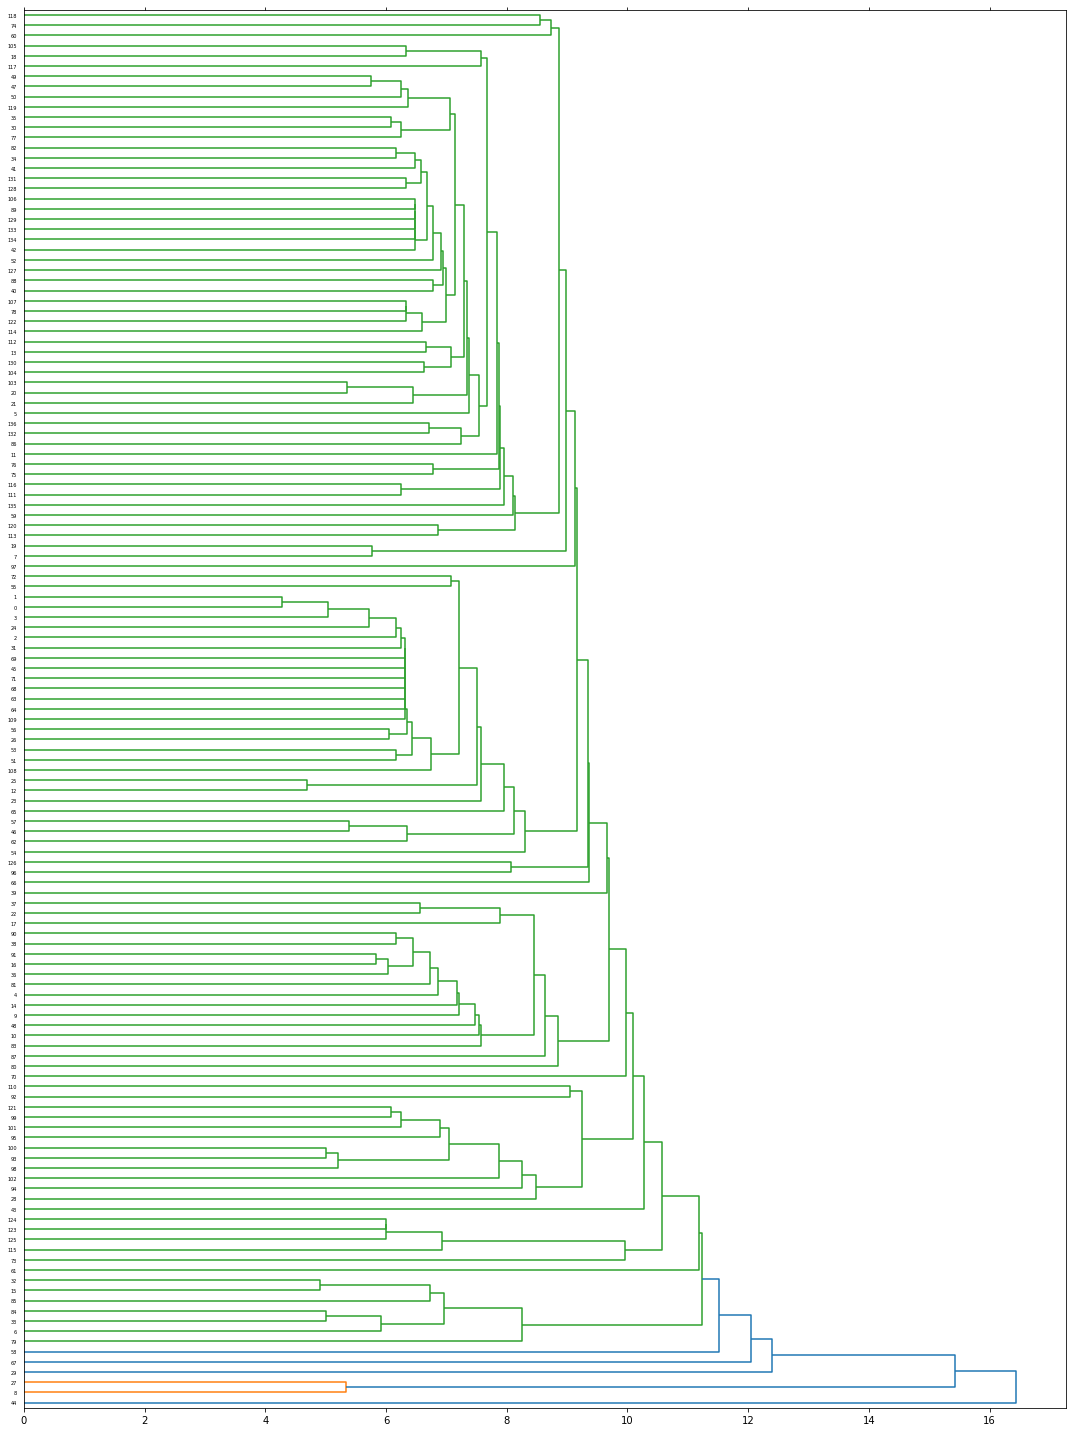

In [49]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(cluster_centers) 

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200)

In [ ]:
ms.fit_predict(X_count)
labels = ms.labels_


In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

KeyError: -1691

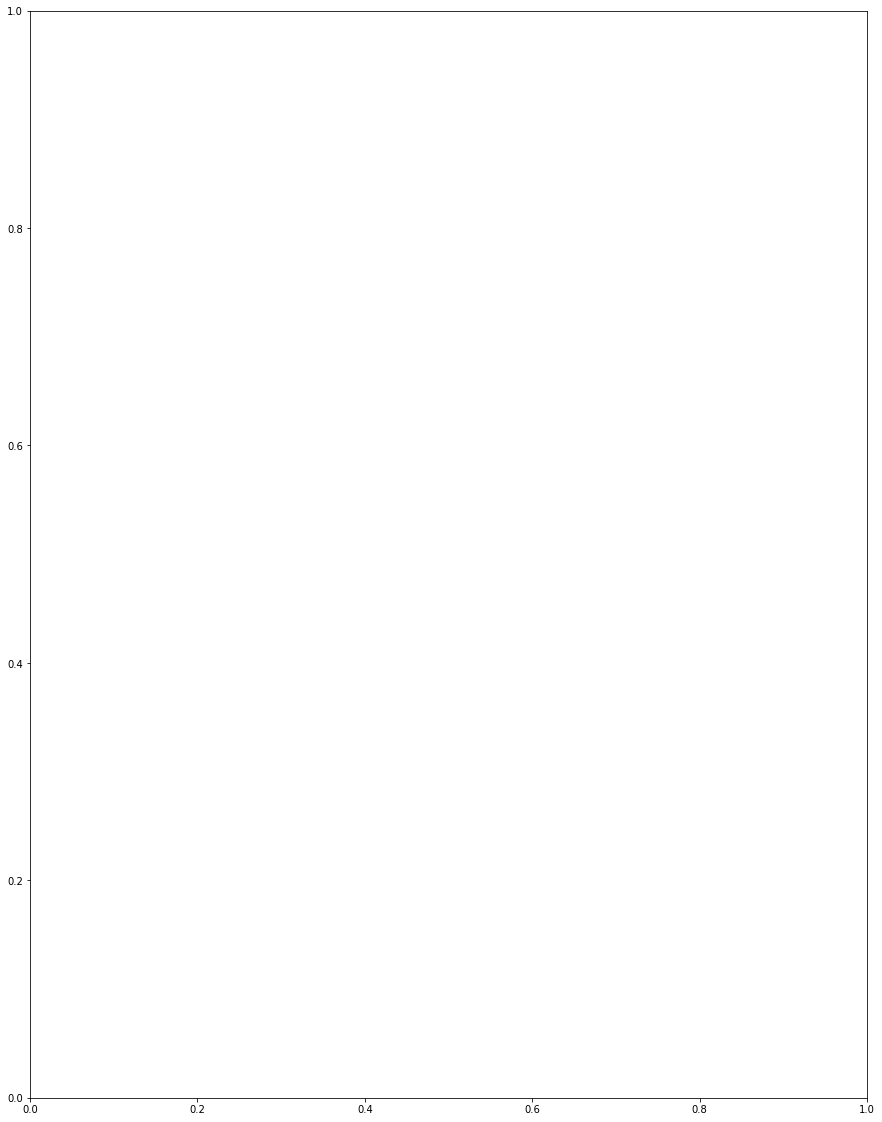

In [27]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(X_count)
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right",labels=df['intent']) #labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tight_layout() 
plt.savefig('ward_clusters.png', dpi=200)

In [26]:
# figure(figsize=(10, 7), dpi=80)
# dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [66]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X_count)
print(model.fit_predict(X_count))
labels = model.labels_
labels

[4 4 4 ... 0 0 1]


array([4, 4, 4, ..., 0, 0, 1])

## Approch 2 - using  TfidfVectorizer


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(corpus) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
print(tfidf_vectorizer.get_feature_names())

(2580, 11458)
['000', '000 start', '000 start time', '000658', '000733', '000803', '001342', '001355', '001638', '001713', '002021', '002316', '002442', '002454', '002858', '002933', '003016', '003259', '003334', '003548', '003727', '003812', '003936', '004011', '004039', '004814', '004924', '005116', '005257', '005300', '005502', '005851', '005935', '00677734', '00677734 cep', '00677734 cep password', '010001', '010010', '010145', '010324', '010409', '010519', '010608', '010643', '010956', '011', '011 20210508', '011 20210508 210040', '011 20210509', '011 20210509 223916', '011 20210512', '011 20210512 134952', '011018', '011028', '011241', '011429', '011549', '011624', '011933', '012117', '012204', '0122227', '0122227 appeasement', '0122227 appeasement complete', '012233', '012413', '012636', '012823', '013637', '013720', '013754', '013857', '013904', '014137', '014357', '014632', '014707', '014848', '0151949', '0151949 rma', '0151949 rma 3616390', '0153654', '0153654 case43822787', 

In [56]:
# 1.dist is defined as 1 - the cosine similarity of each document.
# 2.Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity
# 3.between each document and the other documents in the corpus
# 4.Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [57]:
dist

array([[-2.22044605e-16,  9.78993392e-01,  9.76504806e-01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 9.78993392e-01,  0.00000000e+00,  9.77943547e-01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 9.76504806e-01,  9.77943547e-01,  3.33066907e-16, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -2.22044605e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00, -2.22044605e-16]])

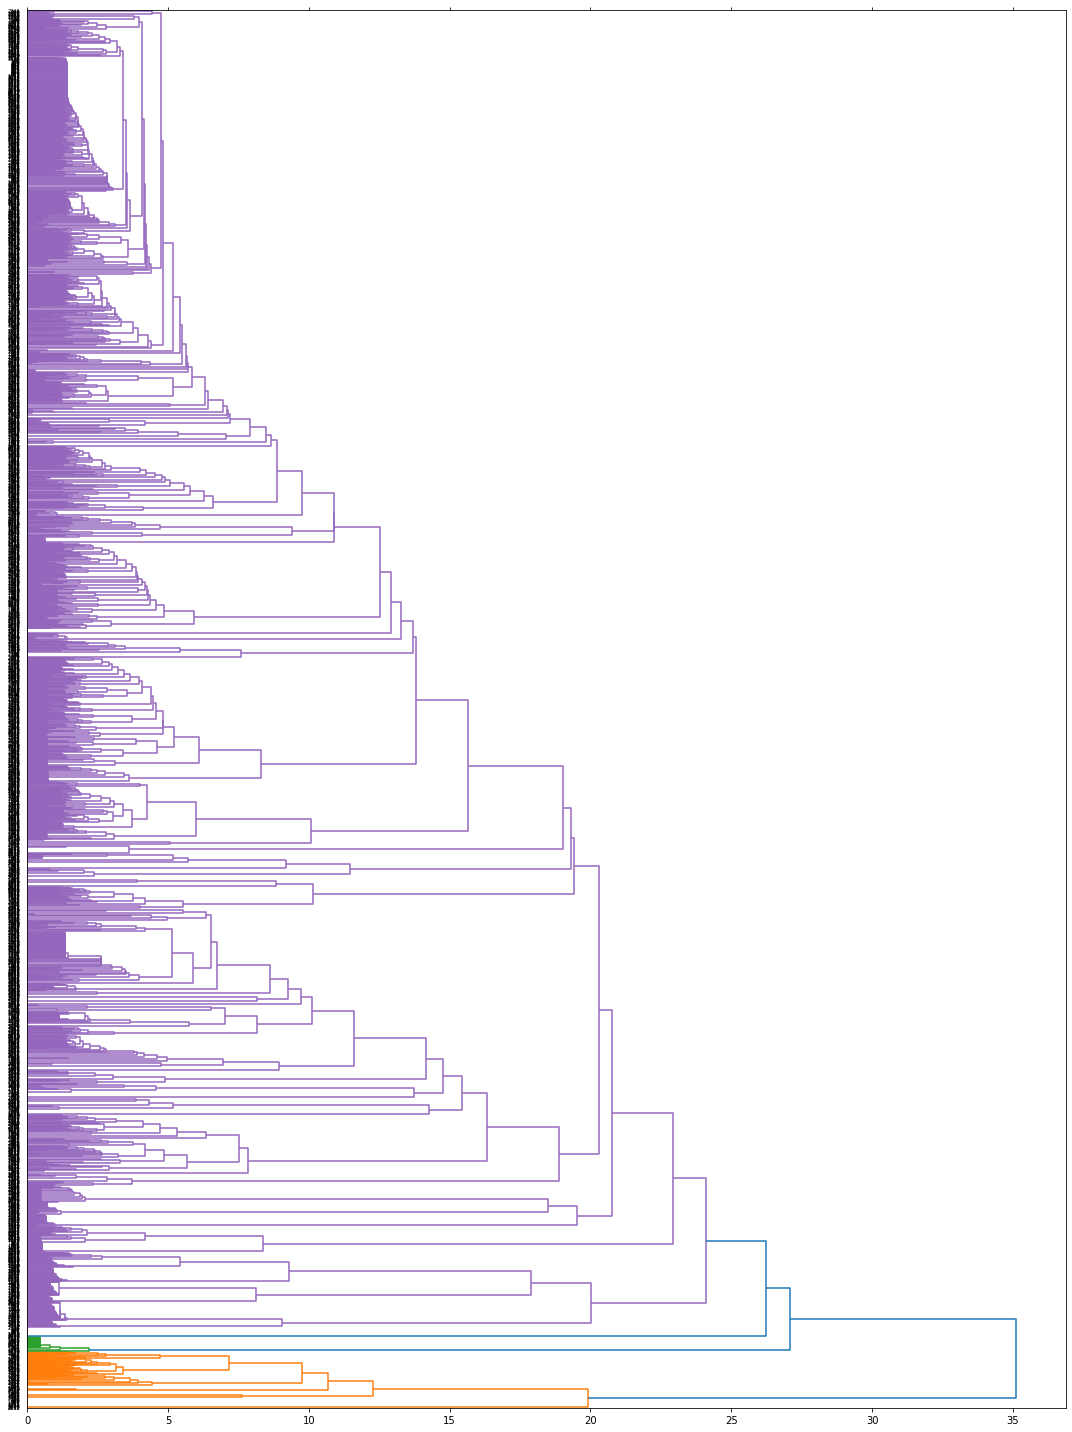

In [61]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [67]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(dist)
print(model.fit_predict(dist))
labels = model.labels_
labels

[0 0 1 ... 0 0 0]


array([0, 0, 1, ..., 0, 0, 0])